In [1]:
import os
import math
import numpy as np
import pandas as pd
import multiprocessing
import matplotlib.pyplot as plt
from IPython.display import HTML
from joblib import Parallel, delayed

In [2]:
def get_frame_data(sim_dir, itr):
    c_iter = str(itr*100).zfill(6)
    posMat = pd.read_csv(os.sep.join([sim_dir, 'Pos_'+c_iter+'.dat']), header=None)
    position = [complex(pos.replace('i','j')) for pos in posMat.values[0]]
    velMat = pd.read_csv(os.sep.join([sim_dir, 'Velocity_'+c_iter+'.dat']), header=None)
    velocity = list()
    for vel in velMat.values[0]:
        if repr(vel)=='0':
            velocity.append(complex('0+0j'))
        else:
            velocity.append(complex(vel.replace('i','j')))
    nbdMat = pd.read_csv(os.sep.join([sim_dir, 'Neighbors_'+c_iter+'.dat']), header=None)
    num_neighbors = [int(nbd) for nbd in nbdMat.values]
    edges = None
    if os.path.getsize(os.sep.join([sim_dir, 'EdgeX_'+c_iter+'.dat'])) > 0:
        edgexMat = pd.read_csv(os.sep.join([sim_dir, 'EdgeX_'+c_iter+'.dat']), header=None)
        edgeyMat = pd.read_csv(os.sep.join([sim_dir, 'EdgeY_'+c_iter+'.dat']), header=None)
        edges = zip(list(edgexMat[0]),list(edgexMat[1]),list(edgeyMat[0]),list(edgeyMat[1]))
    return (position, velocity, num_neighbors, edges)

In [3]:
def visualize_frame(sim_dir, itr, disp):
    itr_s = str(itr).zfill(4)
    data = get_frame_data(sim_dir, itr)
    position = data[0]
    velocity = data[1]
    num_neighbors = data[2]
    print np.mean(num_neighbors)
    edges = data[3]
    cdata = list()
    for nbd in num_neighbors:
        if nbd == 0:
            cdata.append('indianred')
        elif nbd < 4:
            cdata.append('royalblue')
        else:
            cdata.append('seagreen')
    plt.figure(figsize=(3,3), dpi=300)
    plt.scatter(np.real(position), np.imag(position), color=cdata, s=8)
    if edges is not None:
        for e in edges:
            plt.plot([e[0], e[1]], [e[2], e[3]], marker=None, linewidth=0.75, color='gray', alpha=0.4)
    plt.xticks([])
    plt.yticks([])
    plt.xlim([-10.1, 10.1])
    plt.ylim([-10.1, 10.1])
    if disp:
        plt.show()
    else:
        plt.savefig(sim_dir+'_plots'+os.sep+itr_s+'.png', bbox_inches='tight')

5.218009478672986


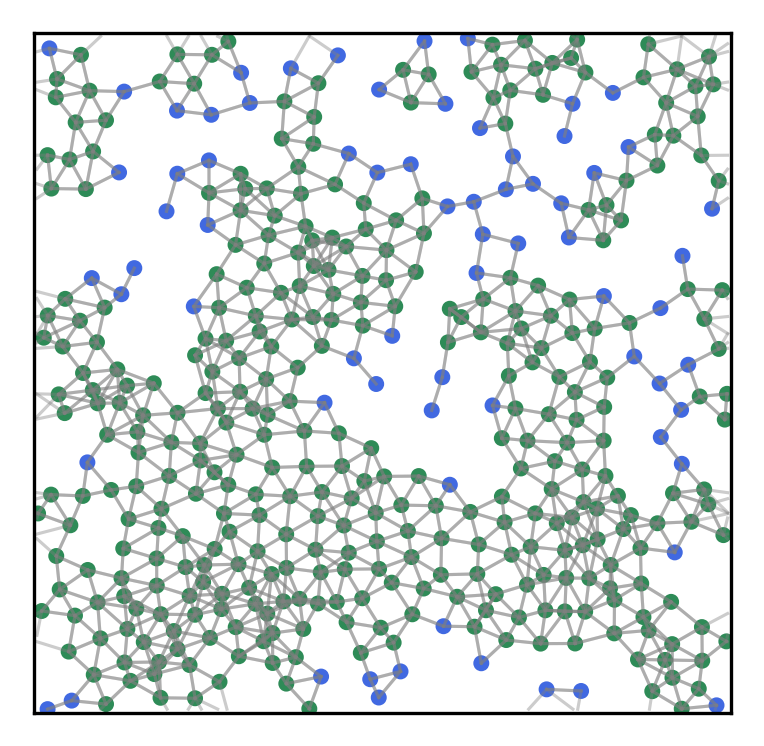

In [4]:
max_iter = 2000
sim_dir = 'adh_pol_sweep/1_adh_20_pol/'
visualize_frame(sim_dir, max_iter, True)

In [6]:
num_cores = multiprocessing.cpu_count() - 1
for ad in ['1', 'f']:
    for pl in ['4', '11', '17', '20']:
        sim_dir = 'adh_pol_sweep/' + ad + '_adh_' + pl + '_pol/'
        os.mkdir(sim_dir+'_plots')
        Parallel(n_jobs=num_cores)(delayed(visualize_frame)(sim_dir, frame, False) for frame in range(1,max_iter+1));

/home/dbhaskar92/anaconda2/lib/python2.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [17]:
os.mkdir(sim_dir+'_plots')
num_cores = multiprocessing.cpu_count()
Parallel(n_jobs=num_cores)(delayed(visualize_frame)(sim_dir, frame, False) for frame in range(1,max_iter+1));

In [18]:
! chmod +x make_png_movie.sh
! cp make_png_movie.sh adh_pol_sweep/a_adh_20_pol/_plots/

Make the movie

In [19]:
! mv adh_pol_sweep/a_adh_20_pol/_plots/my_movie.mp4 videos/a_adh_20_pol.mp4

In [20]:
HTML("""
<video width="640" height="640" controls>
  <source src="videos/a_adh_20_pol.mp4" type="video/mp4">
</video>
""")